In [1]:
pip install yfinance

     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     ------------------ ------------------- 153.6/314.6 kB 2.3 MB/s eta 0:00:01
     -------------------------------------  307.2/314.6 kB 3.8 MB/s eta 0:00:01
     -------------------------------------  307.2/314.6 kB 3.8 MB/s eta 0:00:01
     -------------------------------------  307.2/314.6 kB 3.8 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------

In [46]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [47]:
stocks = ['AAPL', 'GOOGL', 'MSFT']
initial_investment = 1000

In [48]:
data = yf.download(stocks, start='2024-01-01', end='2024-01-31')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [49]:
data

Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-01-02,185.403412,138.169998,370.185425
2024-01-03,184.015198,138.919998,369.915924
2024-01-04,181.678177,136.389999,367.260834
2024-01-05,180.949097,135.729996,367.071198
2024-01-08,185.323517,138.839996,373.998383
2024-01-09,184.904053,140.949997,375.096375
2024-01-10,185.952713,142.279999,382.063446
2024-01-11,185.353485,142.080002,383.920044
2024-01-12,185.683060,142.649994,387.752960


In [50]:
daily_returns = data.pct_change()
daily_returns

Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-01-02,NaN,NaN,NaN
2024-01-03,-0.007488,0.005428,-0.000728
2024-01-04,-0.012700,-0.018212,-0.007178
2024-01-05,-0.004013,-0.004839,-0.000516
2024-01-08,0.024175,0.022913,0.018872
2024-01-09,-0.002263,0.015197,0.002936
2024-01-10,0.005671,0.009436,0.018574
2024-01-11,-0.003222,-0.001406,0.004859
2024-01-12,0.001778,0.004012,0.009984


In [56]:
portfolio = pd.DataFrame(index=data.index, columns=stocks)
portfolio.iloc[0] = initial_investment

In [57]:
for i in range(1, len(portfolio)):
        if not daily_returns.iloc[i - 1].isna().all():
            min_stock = daily_returns.iloc[i - 1].idxmin()
            max_stock = daily_returns.iloc[i - 1].idxmax()

            # Buy low, sell high strategy
            buy_stock = min_stock if not pd.isna(min_stock) else None
            sell_stock = max_stock if not pd.isna(max_stock) else None

            if buy_stock and sell_stock:
                portfolio.iloc[i] = portfolio.iloc[i - 1]
                portfolio.at[data.index[i], buy_stock] += portfolio.at[data.index[i], sell_stock]
                portfolio.at[data.index[i], sell_stock] = 0

In [58]:
portfolio['Total'] = portfolio.sum(axis=1)

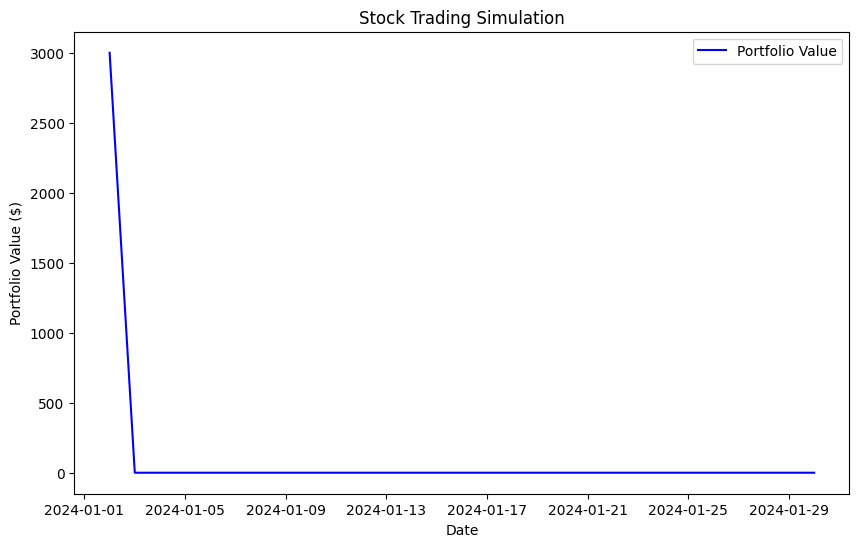

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio['Total'], label='Portfolio Value', color='blue')
plt.title('Stock Trading Simulation')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()